In [ ]:
#Author: Austin Bearden
#Date Implemented: 4/19/2018
#Project: imatrix for Data Sciene Spring 2018 Semester IUPUI
#Teamate: Seth Fuller
#Using Dr. Mohler's code from class

In [202]:
#import statements

%matplotlib inline
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split

import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import optimizers
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions

5


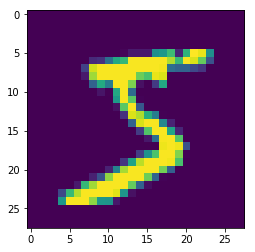

In [78]:
#import data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
plt.imshow(X_train[0])
print (y_train[0])

In [4]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [5]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [6]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [7]:
#Compile and train
# compile the model with a categorical_crossentropy loss
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [8]:
# compile the model with a categorical_crossentropy loss
sgd=optimizers.SGD(lr=.01)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [9]:
# train the model using batch gradient descent
model.fit(X_train, Y_train,
          batch_size=100, nb_epoch=15,verbose=1,
          validation_data=(X_test, Y_test))

/Applications/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 44s 733us/step - loss: 1.4626 - acc: 0.5119 - val_loss: 0.4751 - val_acc: 0.8811
Epoch 2/15
60000/60000 [==============================] - 43s 709us/step - loss: 0.6187 - acc: 0.8042 - val_loss: 0.2665 - val_acc: 0.9313
Epoch 3/15
60000/60000 [==============================] - 43s 714us/step - loss: 0.4325 - acc: 0.8645 - val_loss: 0.1984 - val_acc: 0.9414
Epoch 4/15
60000/60000 [==============================] - 44s 727us/step - loss: 0.3524 - acc: 0.8917 - val_loss: 0.1671 - val_acc: 0.9510
Epoch 5/15
60000/60000 [==============================] - 44s 734us/step - loss: 0.3038 - acc: 0.9073 - val_loss: 0.1411 - val_acc: 0.9590
Epoch 6/15
60000/60000 [==============================] - 45s 747us/step - loss: 0.2712 - acc: 0.9172 - val_loss: 0.1289 - val_acc: 0.9608
Epoch 7/15
60000/60000 [==============================] - 44s 739us/step - loss: 0.2465 - acc: 0.9246 - val_loss: 0.

In [237]:
model.save('matrix_model.h5')

In [203]:
##Re-size and gray scale in order to get image into mnist format
#image to grayscale test

##Gray scale code: https://stackoverflow.com/questions/36326576/convert-image-gray-scale-python-error
from numpy import *
import cv2

im = cv2.imread('NUM_98.JPG', cv2.IMREAD_GRAYSCALE)

# Process Image
im = util.invert(im)
im = image.img_to_array(im)
im /= 255
im = im.reshape(-1,28,28,1)

# Predict Image
prediction = model.predict_classes(im)

In [236]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt
from keras.utils import np_utils

filename = 'Images/NUM_96.JPG'

im = load_img(filename, target_size=(28,28), grayscale=True)

im = img_to_array(im)

im /= 255
im = im.reshape(-1, 28,28,1)


prediction = model.predict_classes(im)


AttributeError: 'Image' object has no attribute 'dtype'

In [227]:
prediction

array([8])